In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

___
# K-Means Model Training and Testing
___

### **K-Means on 6 Numeric Features *without* Scaling** 

In [31]:
#Read the cleaned numeric dataset csv into a dataframe 
test_path = ("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/cleaned_numeric_dataset.csv")
clean_test = pd.read_csv(test_path)

#clean_data only contains numeric features


In [32]:
clean_test.head()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


In [33]:
#Remove Unnamed:0 
clean_test.drop(clean_test.filter(regex="Unnamed").columns, axis=1, inplace=True)

### **For the inital K-Means Clustering**

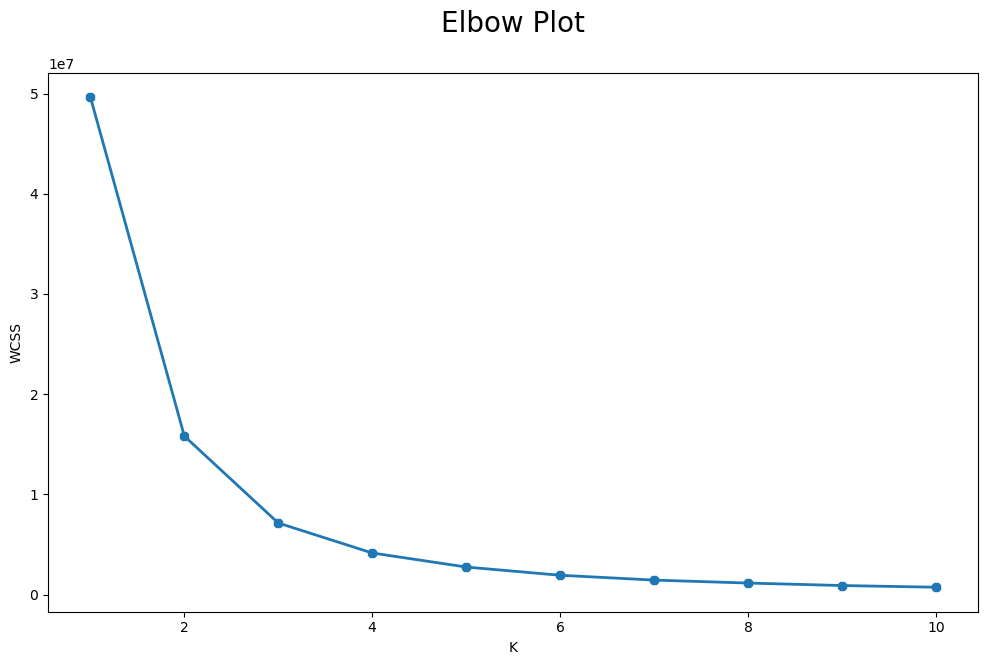

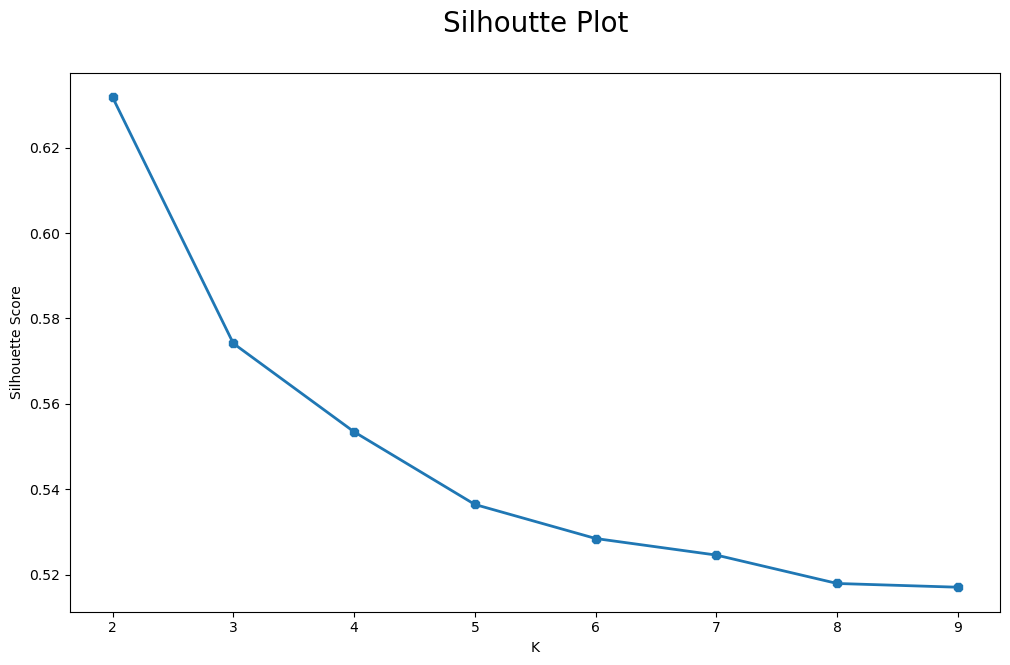

In [34]:
#Create an Elbow Plot of the WCSS (within-cluster-sum-of-squares) with all numeric features

X1 =clean_test.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'age']].values

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

#Create a line plot to visualize the silhouette score
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 10), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()


### **Based on the Elbow and Silhouette Plots, the number of clusters will be 2.**
___

### random_state will be set to 42 for this model.

### This parameter will be implemented to:

* ###   Avoid inconsistent model performance during this testing phase
>
* ###   Ensure reproducibility of the results. This parameter guarantees the same sequence of random numbers is generated each time the model is run - thus verifying the results/output.
>
* ###   Leave room for possible future comparison as it ensures any models trained with different algorithms will be tested on the *same* data, making comparison straightforward

In [35]:
# Create new Kmeans object to get optimal number of clusters

kmeans = KMeans(n_clusters=2, init = "k-means++", n_init=20, random_state =42)

#Fit the object to the clean_data df

kmeans.fit(X1)

KMeans(n_clusters=2, n_init=20, random_state=42)

In [36]:
# Generate labels for the cleaned numeric dataset

labels = kmeans.fit_predict(X1)
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [37]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[5.33048398e+01, 2.17235562e-02, 1.13684578e-01, 1.30860407e-01,
        6.05778398e-02, 1.55403652e-02, 1.71149082e-02, 5.63898705e-02,
        7.94630507e-02, 6.02114814e-02, 6.51910069e-02, 4.21535954e-02,
        5.14958835e-02, 2.40541303e-02, 1.46501246e-01, 3.18133477e-02,
        4.58547046e-01],
       [1.33491185e+02, 1.92282656e-02, 1.32736019e-01, 9.07117330e-02,
        4.74802181e-02, 2.31747413e-02, 1.68310124e-02, 2.50315246e-02,
        6.80300967e-02, 2.10513434e-01, 4.43603824e-02, 6.35489124e-02,
        4.13822738e-02, 2.44634907e-02, 7.69898834e-02, 2.84874210e-02,
        3.22776879e-01]])

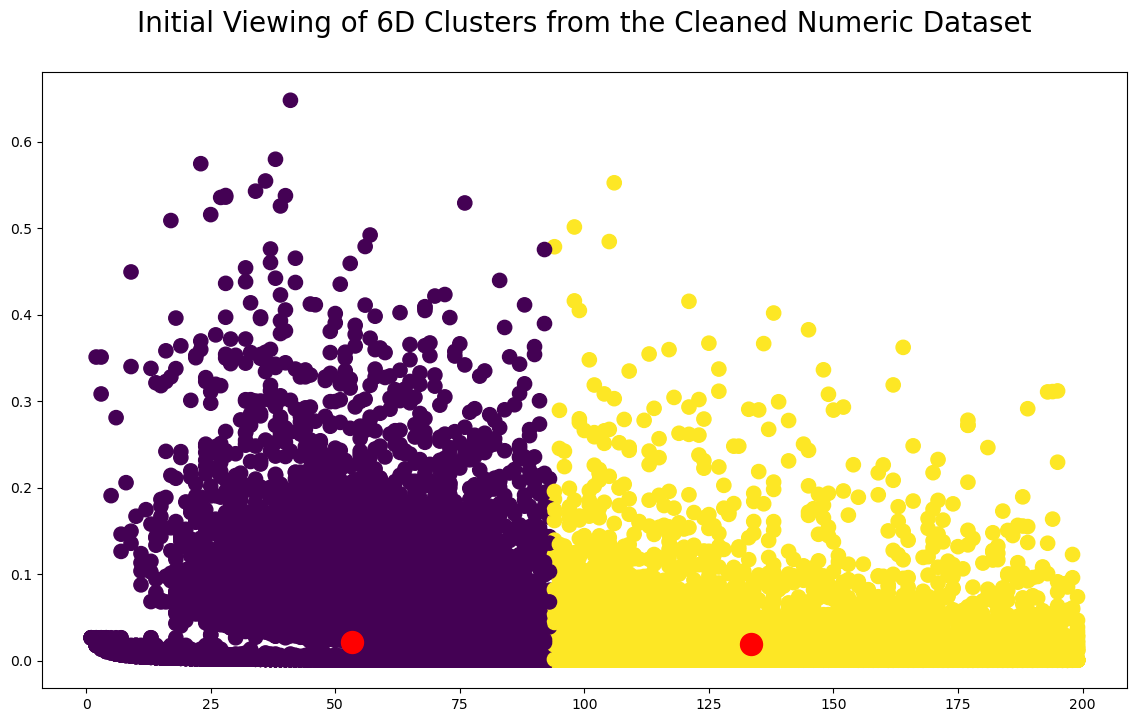

In [38]:
# View 2D clusters from the Cleaned Numeric Dataset

plt.figure(figsize = (14, 8))

plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Initial Viewing of 6D Clusters from the Cleaned Numeric Dataset\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

### **K-Means on 6 Numeric Features *with* Scaling** 
___

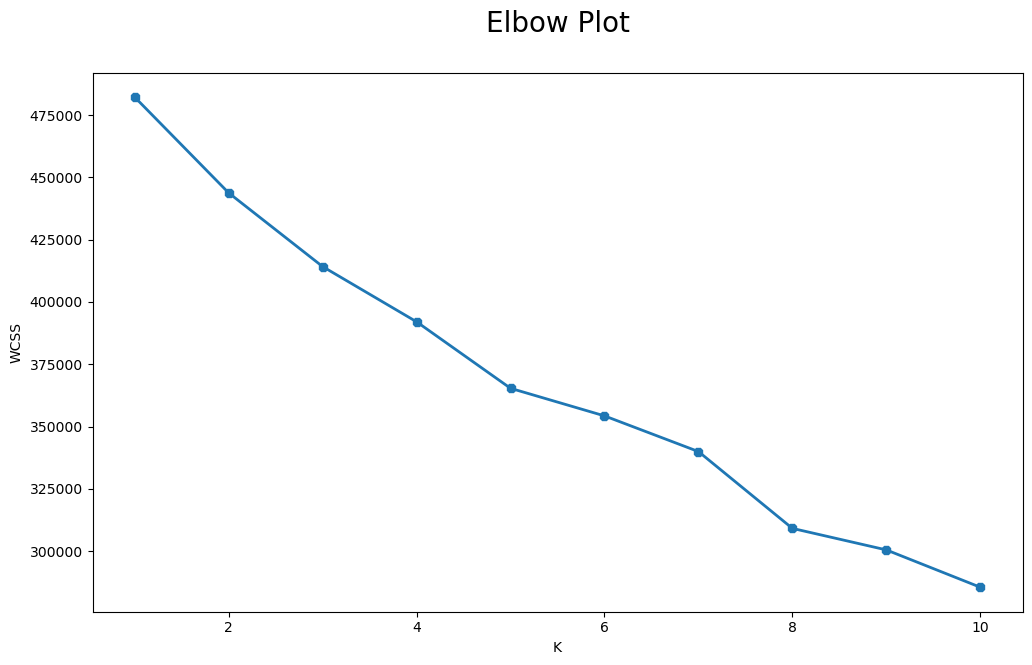

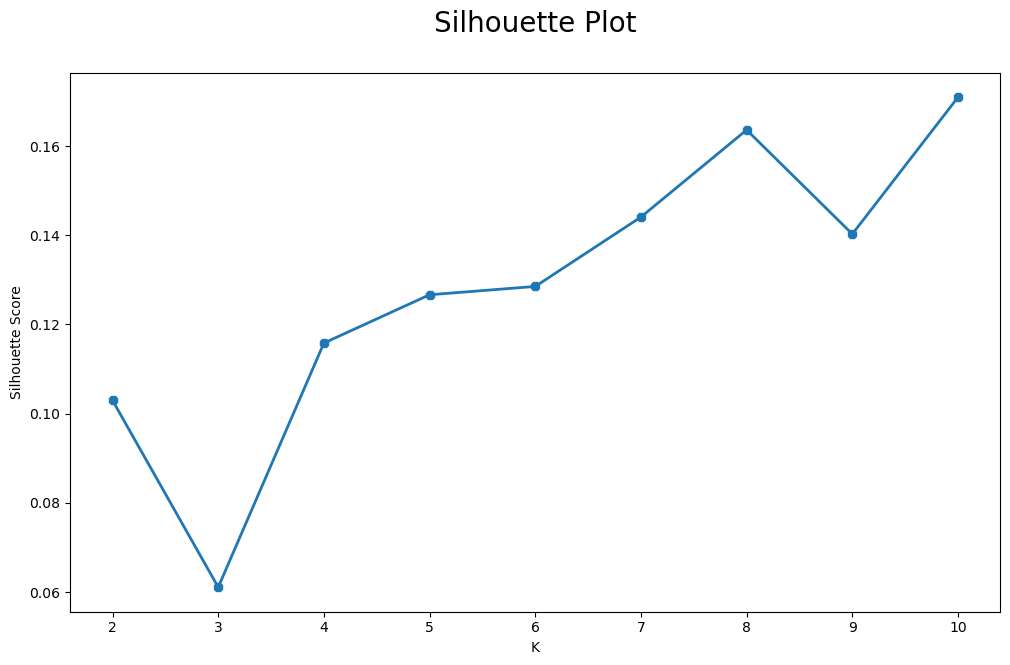

In [39]:
# Create a new KMeans object with 2 clusters. 
# Scaler used to make sure variables have equal range

scaler = StandardScaler()

#fit the KMeans object 
X1_scaled = scaler.fit_transform(X1)

wcss_scaled = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()


# create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhouette Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

*   ### The Elbow Point = 9

*   ### This silhouette score where K=10 is the closest to 0, but no data points are impactfully close to a silhouette score of 1.

In [40]:
# Create a new KMeans object with 8 clusters then fit the data

kmeans_scaled = KMeans(n_clusters=8, init="k-means++", n_init=20, random_state =42)
kmeans_scaled.fit(X1_scaled)


KMeans(n_init=20, random_state=42)

In [41]:
#Labels for scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([4, 1, 3, ..., 6, 6, 6], dtype=int32)

In [42]:
#Get centroids
kmeans_scaled.cluster_centers_

array([[-2.04673612e-01,  2.18920018e-01, -4.40208824e-01,
        -4.18865243e-01,  3.04095599e+00,  3.61298067e-02,
         1.87917812e-02, -1.74426247e-01, -2.53093572e-03,
        -3.62219240e-01, -2.47755275e-01, -2.70972353e-02,
        -7.28151937e-02, -1.51513772e-01, -3.98387622e-01,
        -6.07580691e-02,  9.78089494e-02],
       [-2.51247960e-01, -7.78013642e-02, -4.25300396e-01,
         1.78792953e+00, -2.33659447e-01, -5.16774596e-02,
        -2.04028456e-02, -1.83786512e-01,  1.86285458e-02,
        -4.13661094e-01, -2.59356684e-01, -4.93239114e-02,
         5.92135870e-02,  1.09409403e-01, -3.71065391e-01,
        -1.15720890e-01,  8.23353275e-02],
       [ 4.51595741e-02, -1.57209089e-01,  1.76035322e+00,
        -3.89327434e-01, -2.39055381e-01, -2.31372321e-02,
        -1.97163913e-02, -2.65141883e-01, -3.63180873e-02,
        -3.91751809e-01, -3.02892223e-01,  5.20404896e-02,
         1.01763626e-01,  1.78316532e-01, -4.33716385e-01,
        -1.60632289e-01, -2.2

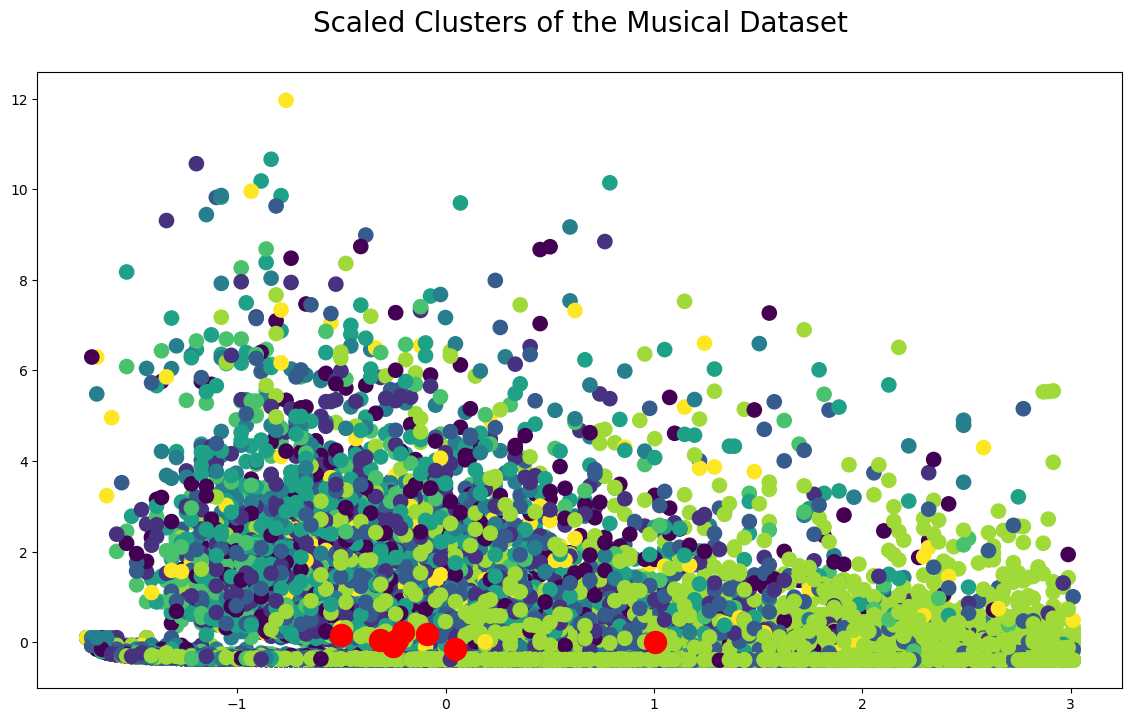

In [43]:
plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Scaled Clusters of the Musical Dataset\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

### There are many features present resulting in the unreadble 2D chart above. 

### Let's reduce dimensionality using PCA

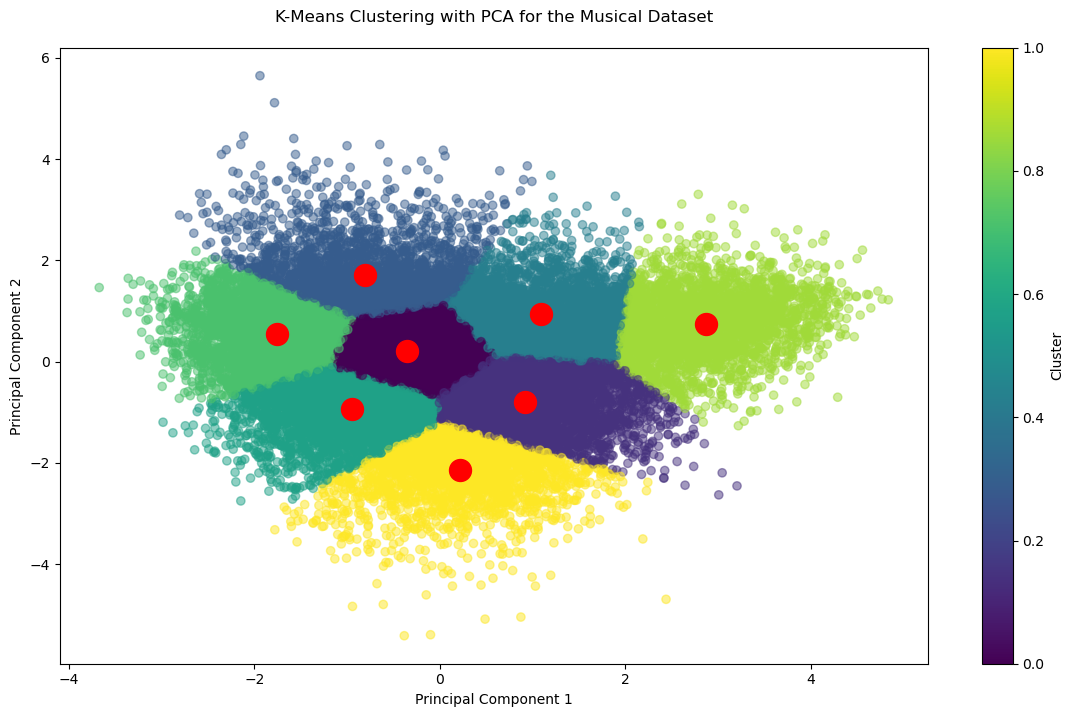

In [44]:
from sklearn.decomposition import PCA

#set PCA components, standardize data
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X1_scaled)

#set up parameters for prediction
kmeans_scaled = KMeans(n_clusters=8, random_state=42)
clusters = kmeans_scaled.fit_predict(transformed_pca)


#plot PCA results
plt.figure(figsize=(14, 8))
plt.scatter(transformed_pca[:,0], transformed_pca[:,1], c=clusters, cmap="viridis", alpha=0.5 )
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title("K-Means Clustering with PCA for the Musical Dataset\n")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

### These results show that the K-Means Clustering Model with PCA works and is able to sort different song topics.

In [58]:
#Read the cleaned numeric dataset csv into a dataframe again
train_path = ("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/cleaned_numeric_dataset.csv")
clean_train = pd.read_csv(train_path)
clean_train.drop(clean_train.filter(regex="Unnamed").columns, axis=1, inplace=True)

#load raw test dataset again
raw_test_data = pd.read_csv("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/recommend_test_set.csv")
raw_test= (raw_test_data)
raw_test.drop(raw_test.filter(regex="Unnamed").columns, axis=1, inplace=True)

#List of categorical identifers to be moved back to the cleaned numeric dataset
cleaned_cat_ids = ['artist_name', 'track_name', 'genre', 'topic']

#add categorical columns to cleaned numeric dataset
clean_train[cleaned_cat_ids] = raw_test[cleaned_cat_ids]

#Store song recommendation in new dataframe called test recs
train_recs = clean_train[cleaned_cat_ids]

#Share song recommendations

print("Here are your K-Means with PCA based Song Recommendations from the Training Dataset\n")
train_recs.head(10)

Here are your K-Means with PCA based Song Recommendations from the Training Dataset



,artist_name,track_name,genre,topic
0,godsmack,immune,rock,world/life
1,dennis brown,second chance,reggae,night/time
2,the black crowes,sister luck,pop,violence
3,jerry lee lewis,your cheating heart,pop,sadness
4,paul anka,eso beso,pop,romantic
5,noro morales,silencio,jazz,violence
6,rage against the machine,pistol grip pump,rock,obscene
7,taste,railway and gun,blues,sadness
8,randy travis,messin' with my mind,country,night/time
9,paramore,playing god,pop,violence


___

# New Sample Prediction

#### Applying the K-Means Clustering algorithm 
___

In [45]:
#Load cleaned recommendation test dataset, remove Unnamed:0 column again, verify

test_data = pd.read_csv("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/rec_test_clean_set.csv")

#Remove "Unnamed:0" column from raw dataframe
test_data.drop(test_data.filter(regex="Unnamed").columns, axis=1, inplace=True)

#Verify "Unnamed:0" column removal
test_data.head()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,1998,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,1993,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,1990,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,1960,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,1966,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429


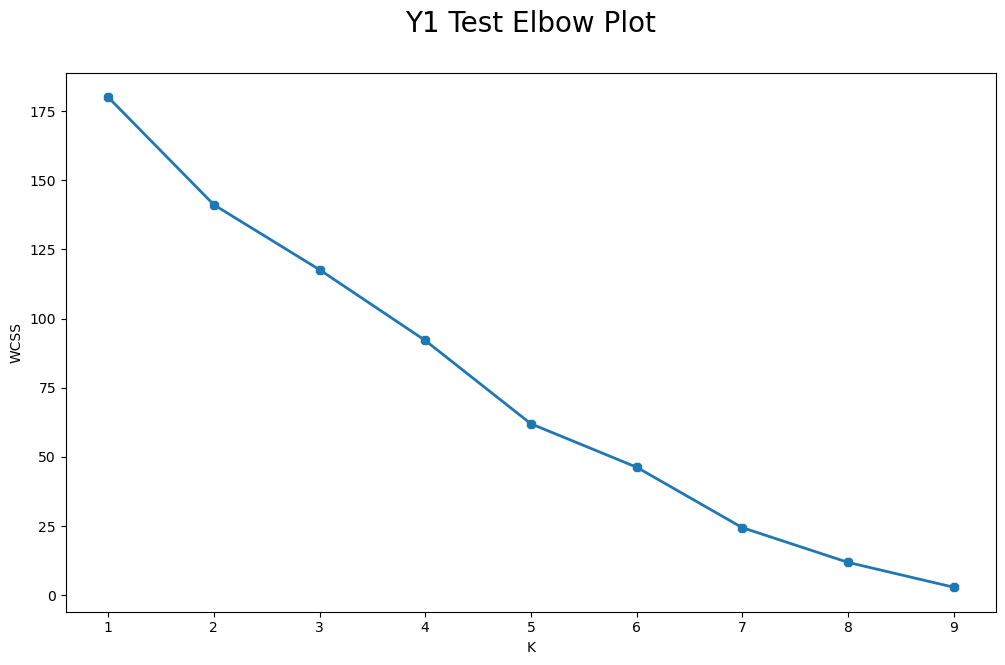

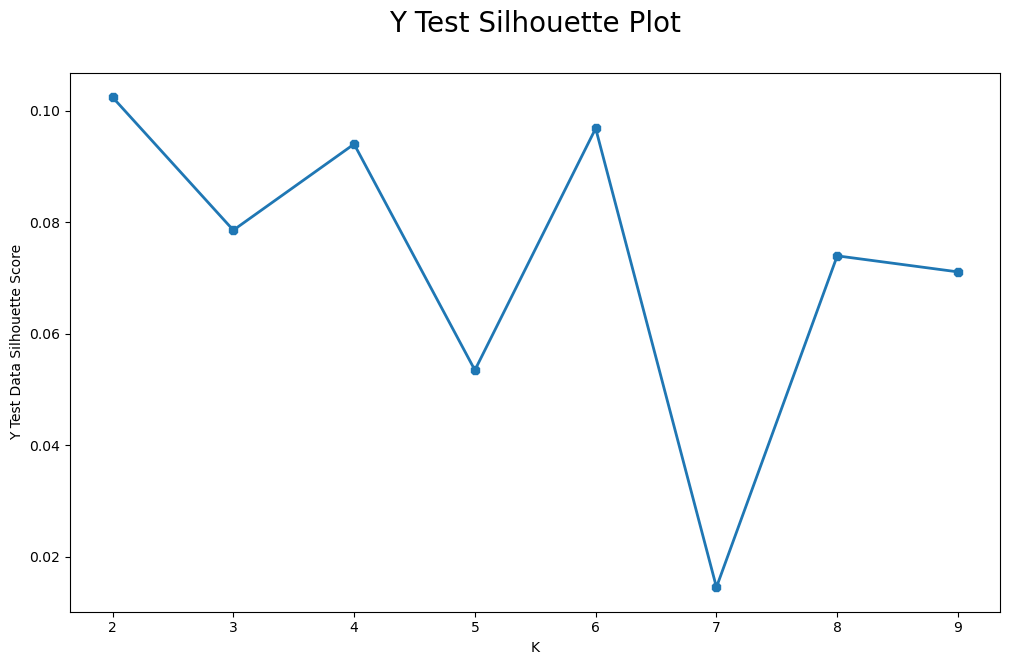

In [46]:
#Store test data in Y1 (training data in X1)
Y1 = test_data

# Create new Kmeans object 

kmeans = KMeans(n_clusters=2, init = "k-means++", n_init=20, random_state =42)

#scaler 
scaler = StandardScaler()

#fit the KMeans object to test
Y1_scaled = scaler.fit_transform(Y1)

wcss_scaled = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Y1_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 10), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Y1 Test Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()


# create a plot of silhoutte score for test

silhouette_scaled = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    predictions = kmeans.fit_predict(Y1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(Y1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 10), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Y Test Silhouette Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Y Test Data Silhouette Score')
plt.show()

In [47]:
#Labels for Y1 (test) scaled data
labels = kmeans_scaled.fit_predict(Y1_scaled)
labels

array([4, 2, 6, 0, 5, 3, 7, 2, 2, 1], dtype=int32)

In [48]:
#Get centroids
kmeans_scaled.cluster_centers_

array([[-1.23450178, -1.17057854,  2.90704564, -0.81607288, -0.77891436,
        -0.10240565, -0.39422551, -0.45973356, -0.37905488, -0.89108214,
        -0.32501032, -0.11662054,  2.38617559, -0.4014732 , -0.37821548,
         2.4041733 , -0.53265843,  1.23450178],
       [ 1.46597087,  0.66453271, -0.42132931,  1.53962591,  0.21468152,
        -0.30342198, -0.2104942 , -0.51298544, -0.39022992, -0.47654543,
        -0.33805217, -0.4466836 , -1.14231129, -0.42051704, -0.455742  ,
         0.15329177, -0.32153818, -1.46597087],
       [ 0.03306701, -0.74423956, -0.13602177, -0.77896535, -0.40252499,
         0.94661734, -0.23101404, -0.17227255, -0.24361422,  1.38198103,
        -0.3326302 , -0.30946448,  0.32460794, -0.41259983, -0.42351143,
         0.07032545, -0.20824831, -0.03306701],
       [-1.67539528, -0.28082763, -0.40908209,  1.2971897 ,  0.4437414 ,
        -0.92066618, -0.40993416, -0.49071343, -0.38555608,  0.4500138 ,
        -0.33259756, -0.30863836,  0.33343945, -0.412

In [49]:
from sklearn.decomposition import PCA


# KMeans on full scaled data
kmeans_scaled = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_scaled.fit_predict(Y1_scaled)

# Add cluster labels to test_data
test_data["Class_Label"] = clusters

# Reduce dimensions for visualization
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(Y1_scaled)


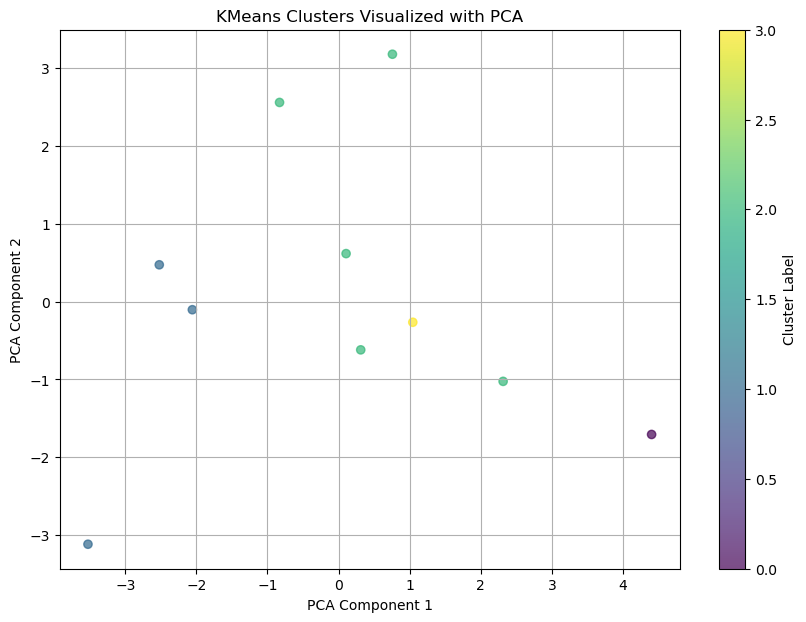

In [53]:
# Create a scatter plot of the two PCA components, colored by cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(transformed_pca[:, 0], transformed_pca[:, 1], 
                      c=clusters, cmap='viridis', alpha=0.7)

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters Visualized with PCA')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

In [50]:
test_data.head()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Class_Label
0,1998,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,1
1,1993,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,2
2,1990,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,2
3,1960,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,0
4,1966,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,2


In [52]:
#load raw test dataset again
raw_test_data = pd.read_csv("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/recommend_test_set.csv")
raw_test= (raw_test_data)
raw_test.drop(raw_test.filter(regex="Unnamed").columns, axis=1, inplace=True)

#List of categorical identifers to be moved back to the cleaned numeric dataset
testdf_cat_ids = ['artist_name', 'track_name', 'genre', 'topic']

#add categorical columns to cleaned recommendation numeric dataset
test_data[testdf_cat_ids] = raw_test[testdf_cat_ids]

#Store song recommendation in new dataframe called test recs
test_recs = test_data[testdf_cat_ids]

#Share song recommendations

print("Here are your K-Means with PCA based Song Recommendations\n")
test_recs

Here are your K-Means with PCA based Song Recommendations



,artist_name,track_name,genre,topic
0,godsmack,immune,rock,world/life
1,dennis brown,second chance,reggae,night/time
2,the black crowes,sister luck,pop,violence
3,jerry lee lewis,your cheating heart,pop,sadness
4,paul anka,eso beso,pop,romantic
5,noro morales,silencio,jazz,violence
6,rage against the machine,pistol grip pump,rock,obscene
7,taste,railway and gun,blues,sadness
8,randy travis,messin' with my mind,country,night/time
9,paramore,playing god,pop,violence
